In [ ]:
import itertools
import numpy as np
import numpy.linalg as la
import pandas as pd
import matplotlib.pyplot as graph
import seaborn as sns
from tqdm import tqdm


# Hyperparameters
reso_x, reso_y = 2000, 3000
freq = np.pi * 0.04
wavelenght = (freq / np.pi / 2)**-1
peak_power = 100

$$ p = P_{init} \cdot {{sin(f \pi x)} \over {r}} $$

In [ ]:
# Data = [x, y, power]
emitters = np.array([
    [1000, 0, 1400]
])
print(emitters.shape)


def pixel_intensity(x, y):
    power = 0.0
    for ith_emit in range(emitters.shape[0]):
        emit_x, emit_y, energy = emitters[ith_emit]
        r = np.sqrt(
            (emit_x - x)**2  # X
            + (emit_y - y)**2  # Y
        )
        power += energy * np.sin(freq * r) * r**-1
    return min(power, peak_power)

(1, 3)


In [ ]:
# Compute solution
simple_grid = np.zeros((reso_x, reso_y))
for x, y in tqdm(itertools.product(range(reso_x), range(reso_y)), total=reso_x * reso_y):
    simple_grid[x, y] = pixel_intensity(x, y)

 50%|████▉     | 2992351/6000000 [00:51<00:36, 81842.24it/s]<ipython-input-2-4976d2c0d2d7>:16: RuntimeWarning: divide by zero encountered in double_scalars
  power += energy * np.sin(freq * r) * r**-1
<ipython-input-2-4976d2c0d2d7>:16: RuntimeWarning: invalid value encountered in double_scalars
  power += energy * np.sin(freq * r) * r**-1
100%|██████████| 6000000/6000000 [01:32<00:00, 64557.37it/s]


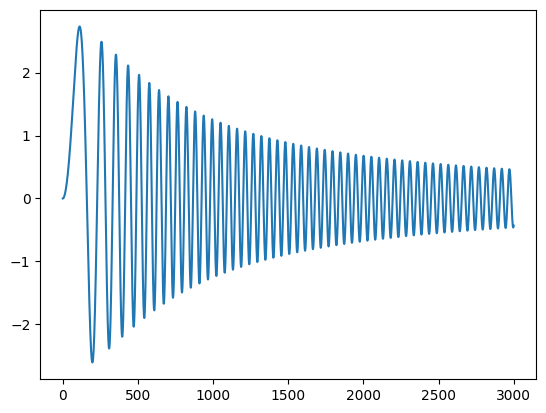

In [ ]:
graph.plot(simple_grid[500, :])
graph.show()

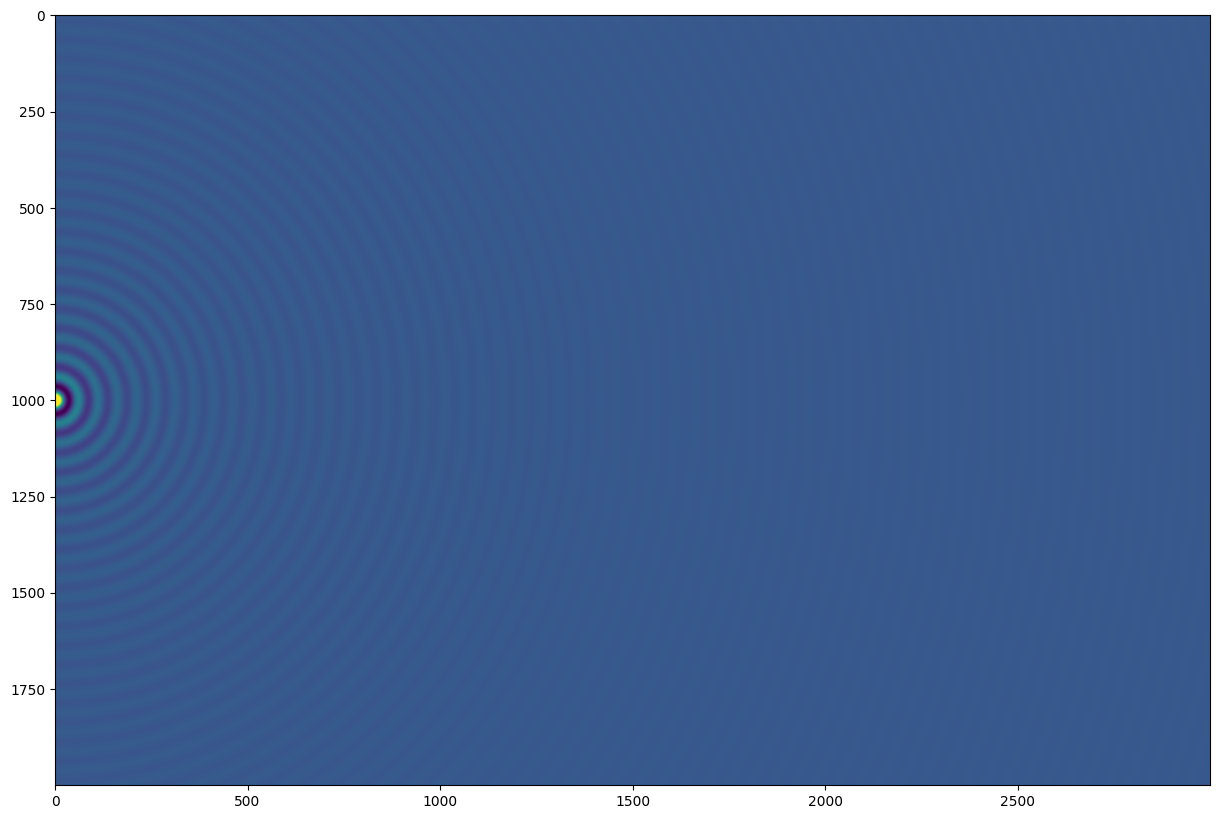

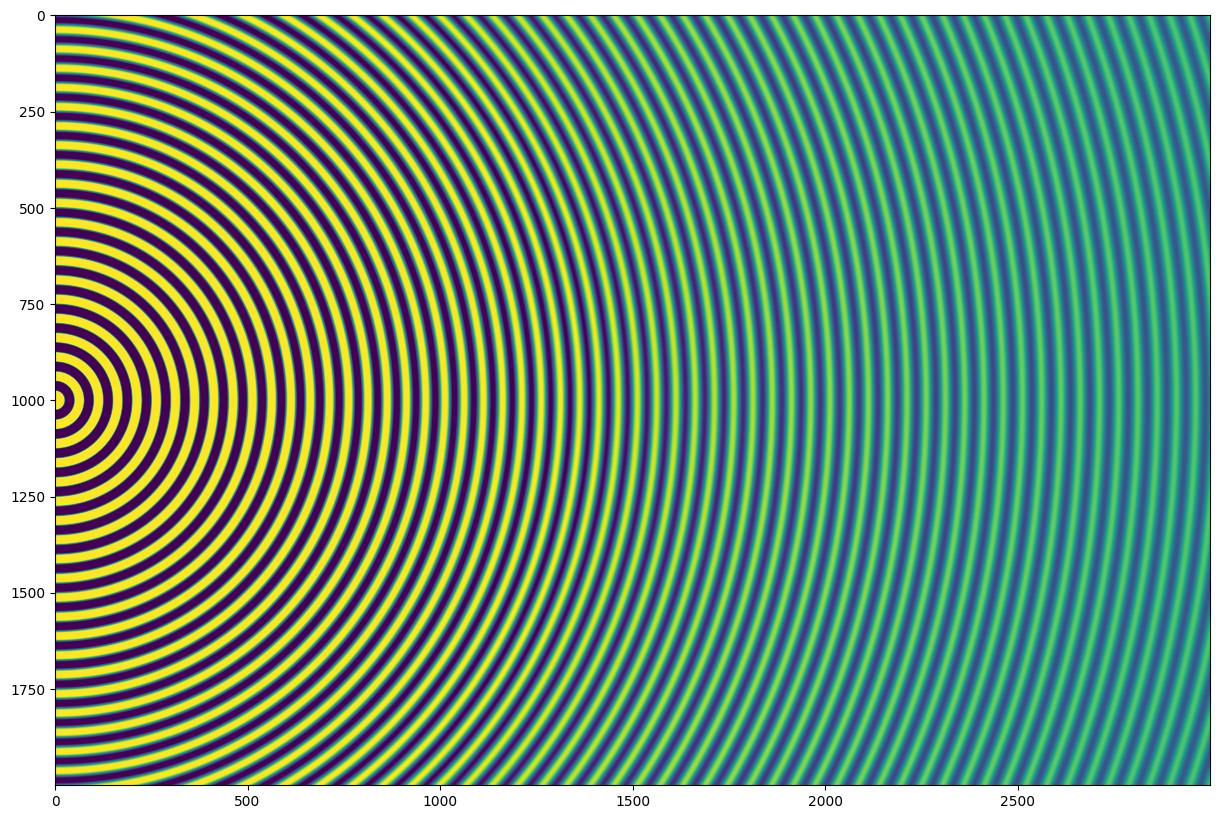

In [ ]:
graph.figure(figsize=(15, 10))
graph.imshow(simple_grid, cmap='viridis')
graph.show()


graph.figure(figsize=(15, 10))
graph.imshow(simple_grid.clip(-1, 1), cmap='viridis')
graph.show()

# Add multiple emitters

(19, 3)


 45%|████▍     | 2699546/6000000 [06:30<06:54, 7956.62it/s]<ipython-input-2-4976d2c0d2d7>:16: RuntimeWarning: divide by zero encountered in double_scalars
  power += energy * np.sin(freq * r) * r**-1
<ipython-input-2-4976d2c0d2d7>:16: RuntimeWarning: invalid value encountered in double_scalars
  power += energy * np.sin(freq * r) * r**-1
100%|██████████| 6000000/6000000 [14:25<00:00, 6933.03it/s]


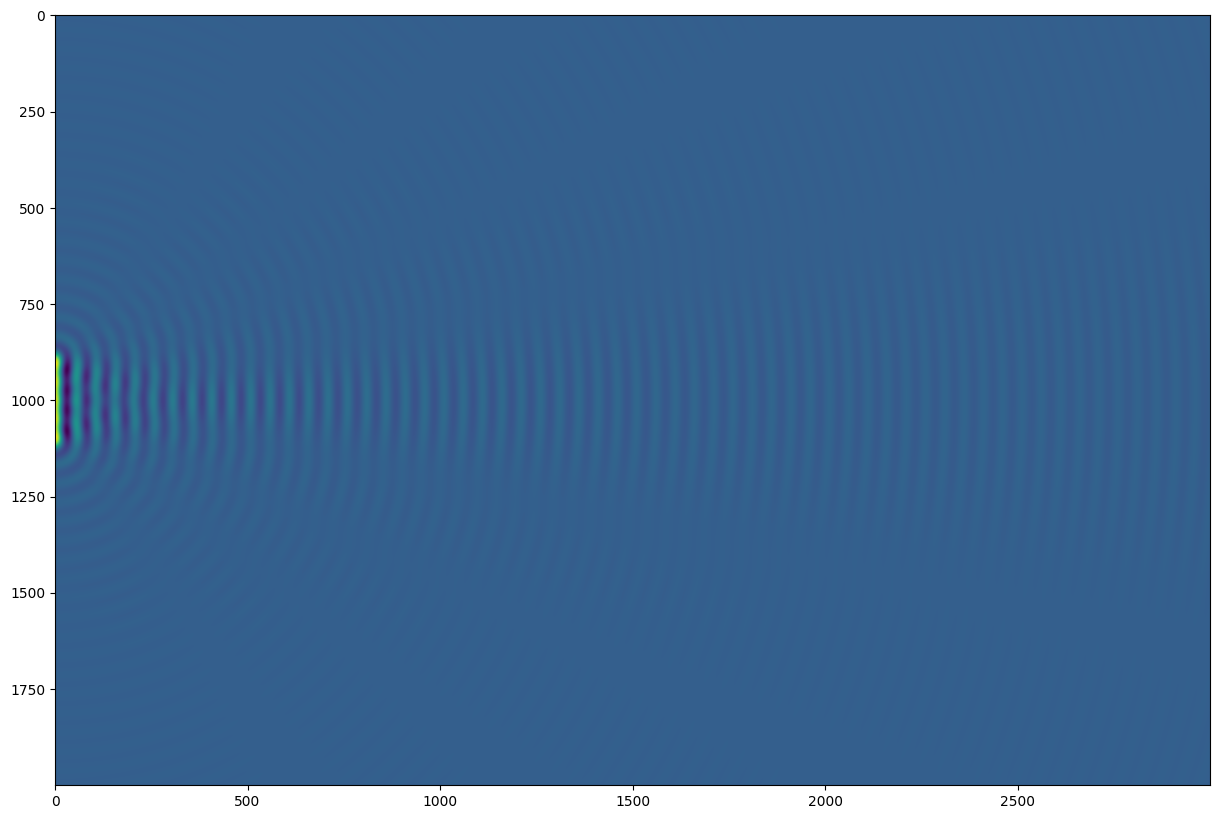

In [ ]:
# Arrays need to be space 1/4 waveleght apart
emitters = np.array([
    [1000 + i*(wavelenght/4), 0, 100] for i in np.arange(-9, 10)
])
print(emitters.shape)

grid = np.zeros((reso_x, reso_y))
for x, y in tqdm(itertools.product(range(reso_x), range(reso_y)), total=reso_x * reso_y):
    grid[x, y] = pixel_intensity(x, y)


graph.figure(figsize=(15, 10))
graph.imshow(grid, cmap='viridis')
graph.show()

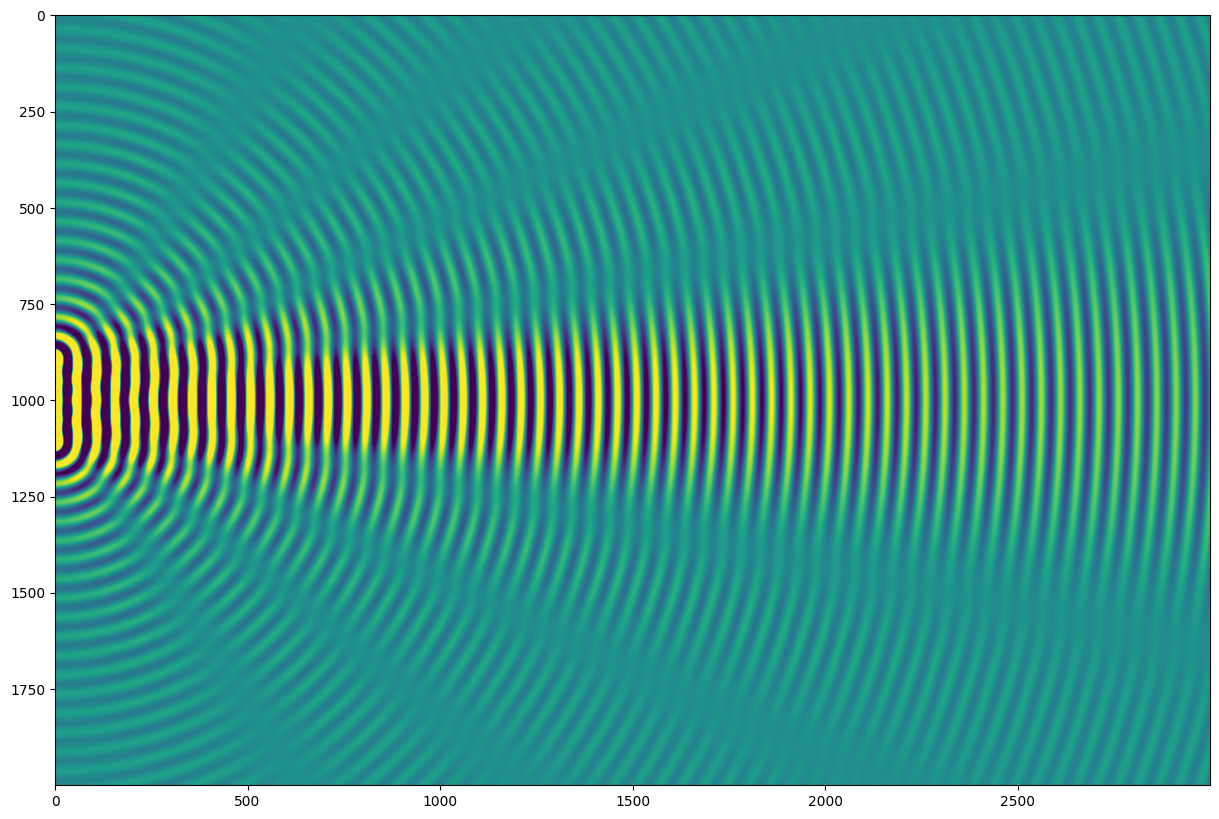

In [ ]:
graph.figure(figsize=(15, 10))
graph.imshow(grid.clip(-1, 1), cmap='viridis')
graph.show()